In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import os
import pathlib

In [76]:
import statsmodels.api as sm
from patsy import dmatrices

In [3]:
nb_path = pathlib.Path().resolve()

In [5]:
file_path = nb_path.parent / 'data' / 'processed' / 'QC2' / 'Temp_Sensors'

In [6]:
file = os.path.join(file_path,'temp_sensor_means.csv')

In [10]:
df = pd.read_csv(file)
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          95 non-null     object 
 1   Chamber_Temp  95 non-null     float64
 2   Collar        95 non-null     object 
 3   CO2_Flux      95 non-null     float64
 4   Site          95 non-null     object 
 5   Type          95 non-null     object 
 6   Chamber Used  95 non-null     object 
 7   Temperature   93 non-null     float64
 8   Moisture      93 non-null     float64
 9   date          95 non-null     object 
 10  time          95 non-null     object 
 11  hour          95 non-null     int64  
 12  sensor_mean   62 non-null     float64
dtypes: float64(5), int64(1), object(7)
memory usage: 9.8+ KB


In [17]:
grouped = df.groupby('Collar')

In [ ]:
def make_scatter_plot(group):
    fig, ax = plt.subplots(figsize = (5,3))
    ax.scatter(group[1]['sensor_mean'],group[1]['CO2_Flux'])
    
    ax.set_title('{}: CO2 v. Sensor Temperature'.format(group[0]))
    filename = '{}_sensor_temp_plot'.format(group[0])
    #plt.savefig(os.path.join(file_path,filename))
    #plt.show()

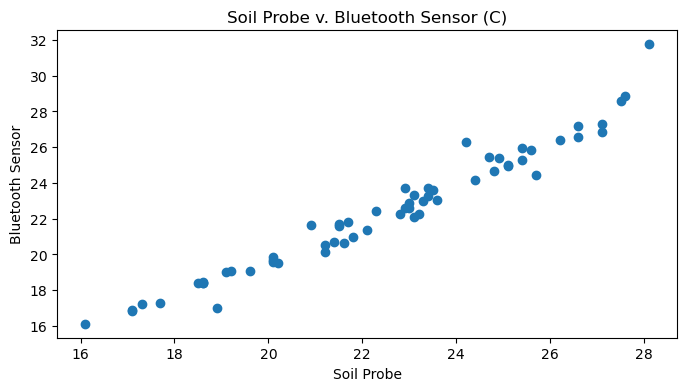

In [75]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(df['Temperature'],df['sensor_mean'])
ax.set_title('Soil Probe v. Bluetooth Sensor (C)')
ax.set_xlabel('Soil Probe')
ax.set_ylabel('Bluetooth Sensor')
filename = 'inst_comparison_scatter.png'
plt.savefig(os.path.join(file_path,filename))
plt.show()

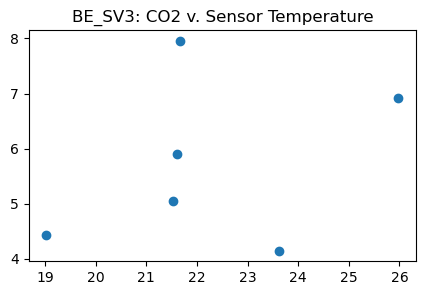

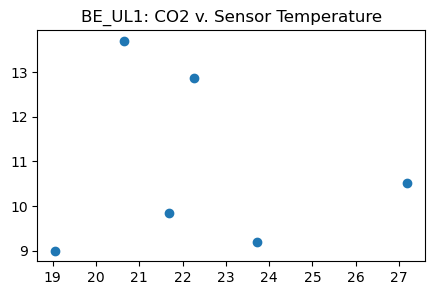

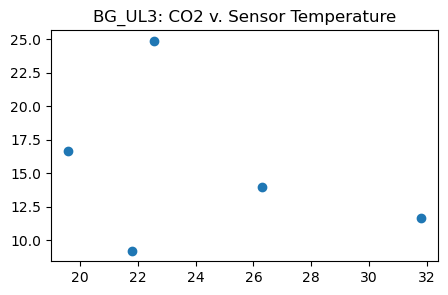

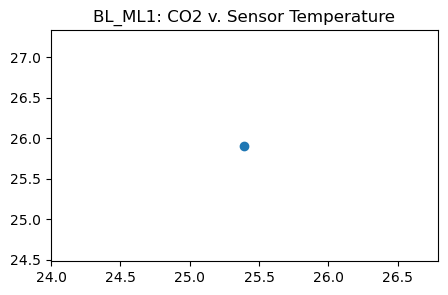

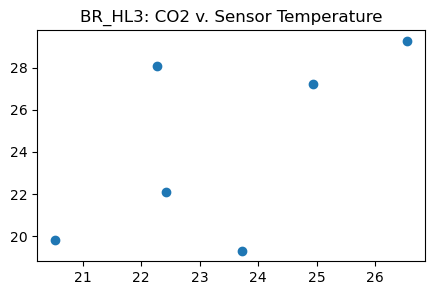

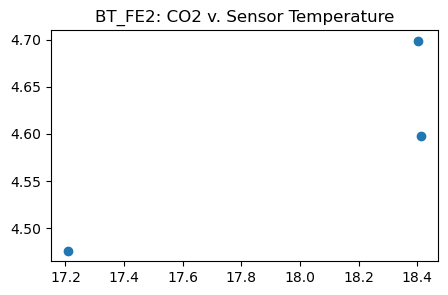

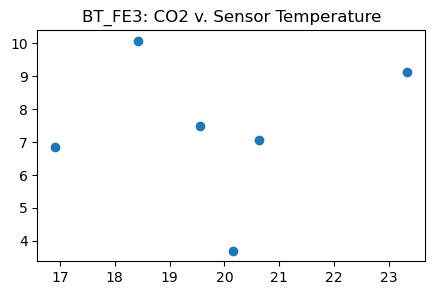

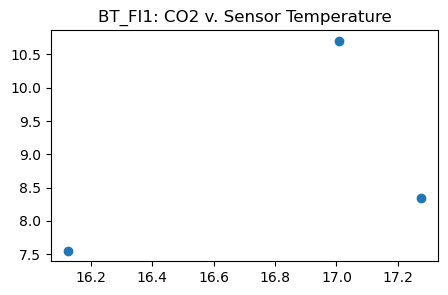

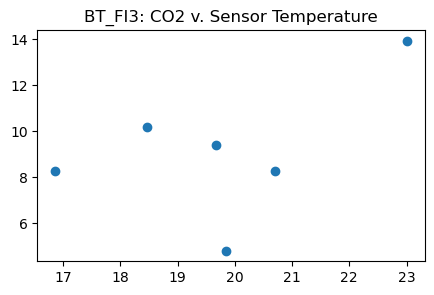

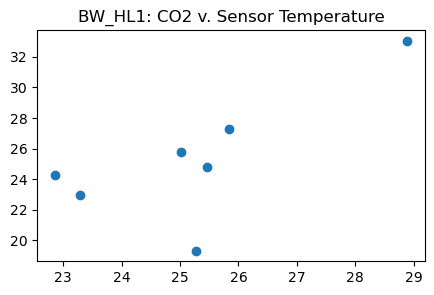

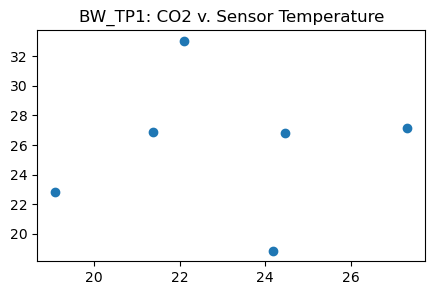

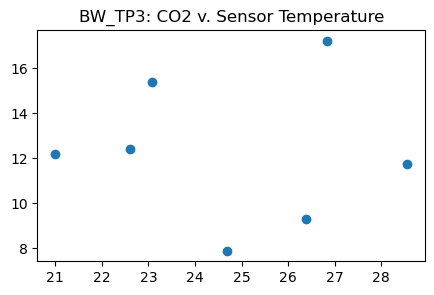

In [31]:
for group in grouped:
    fig, ax = plt.subplots(figsize = (5,3))
    ax.scatter(group[1]['sensor_mean'],group[1]['CO2_Flux'])
    ax.set_title('{}: CO2 v. Sensor Temperature'.format(group[0]))
    filename = '{}_sensor_temp_plot'.format(group[0])
    plt.savefig(os.path.join(file_path,filename))
    plt.show()

In [54]:
collars = [i for i in df['Collar'].unique()]

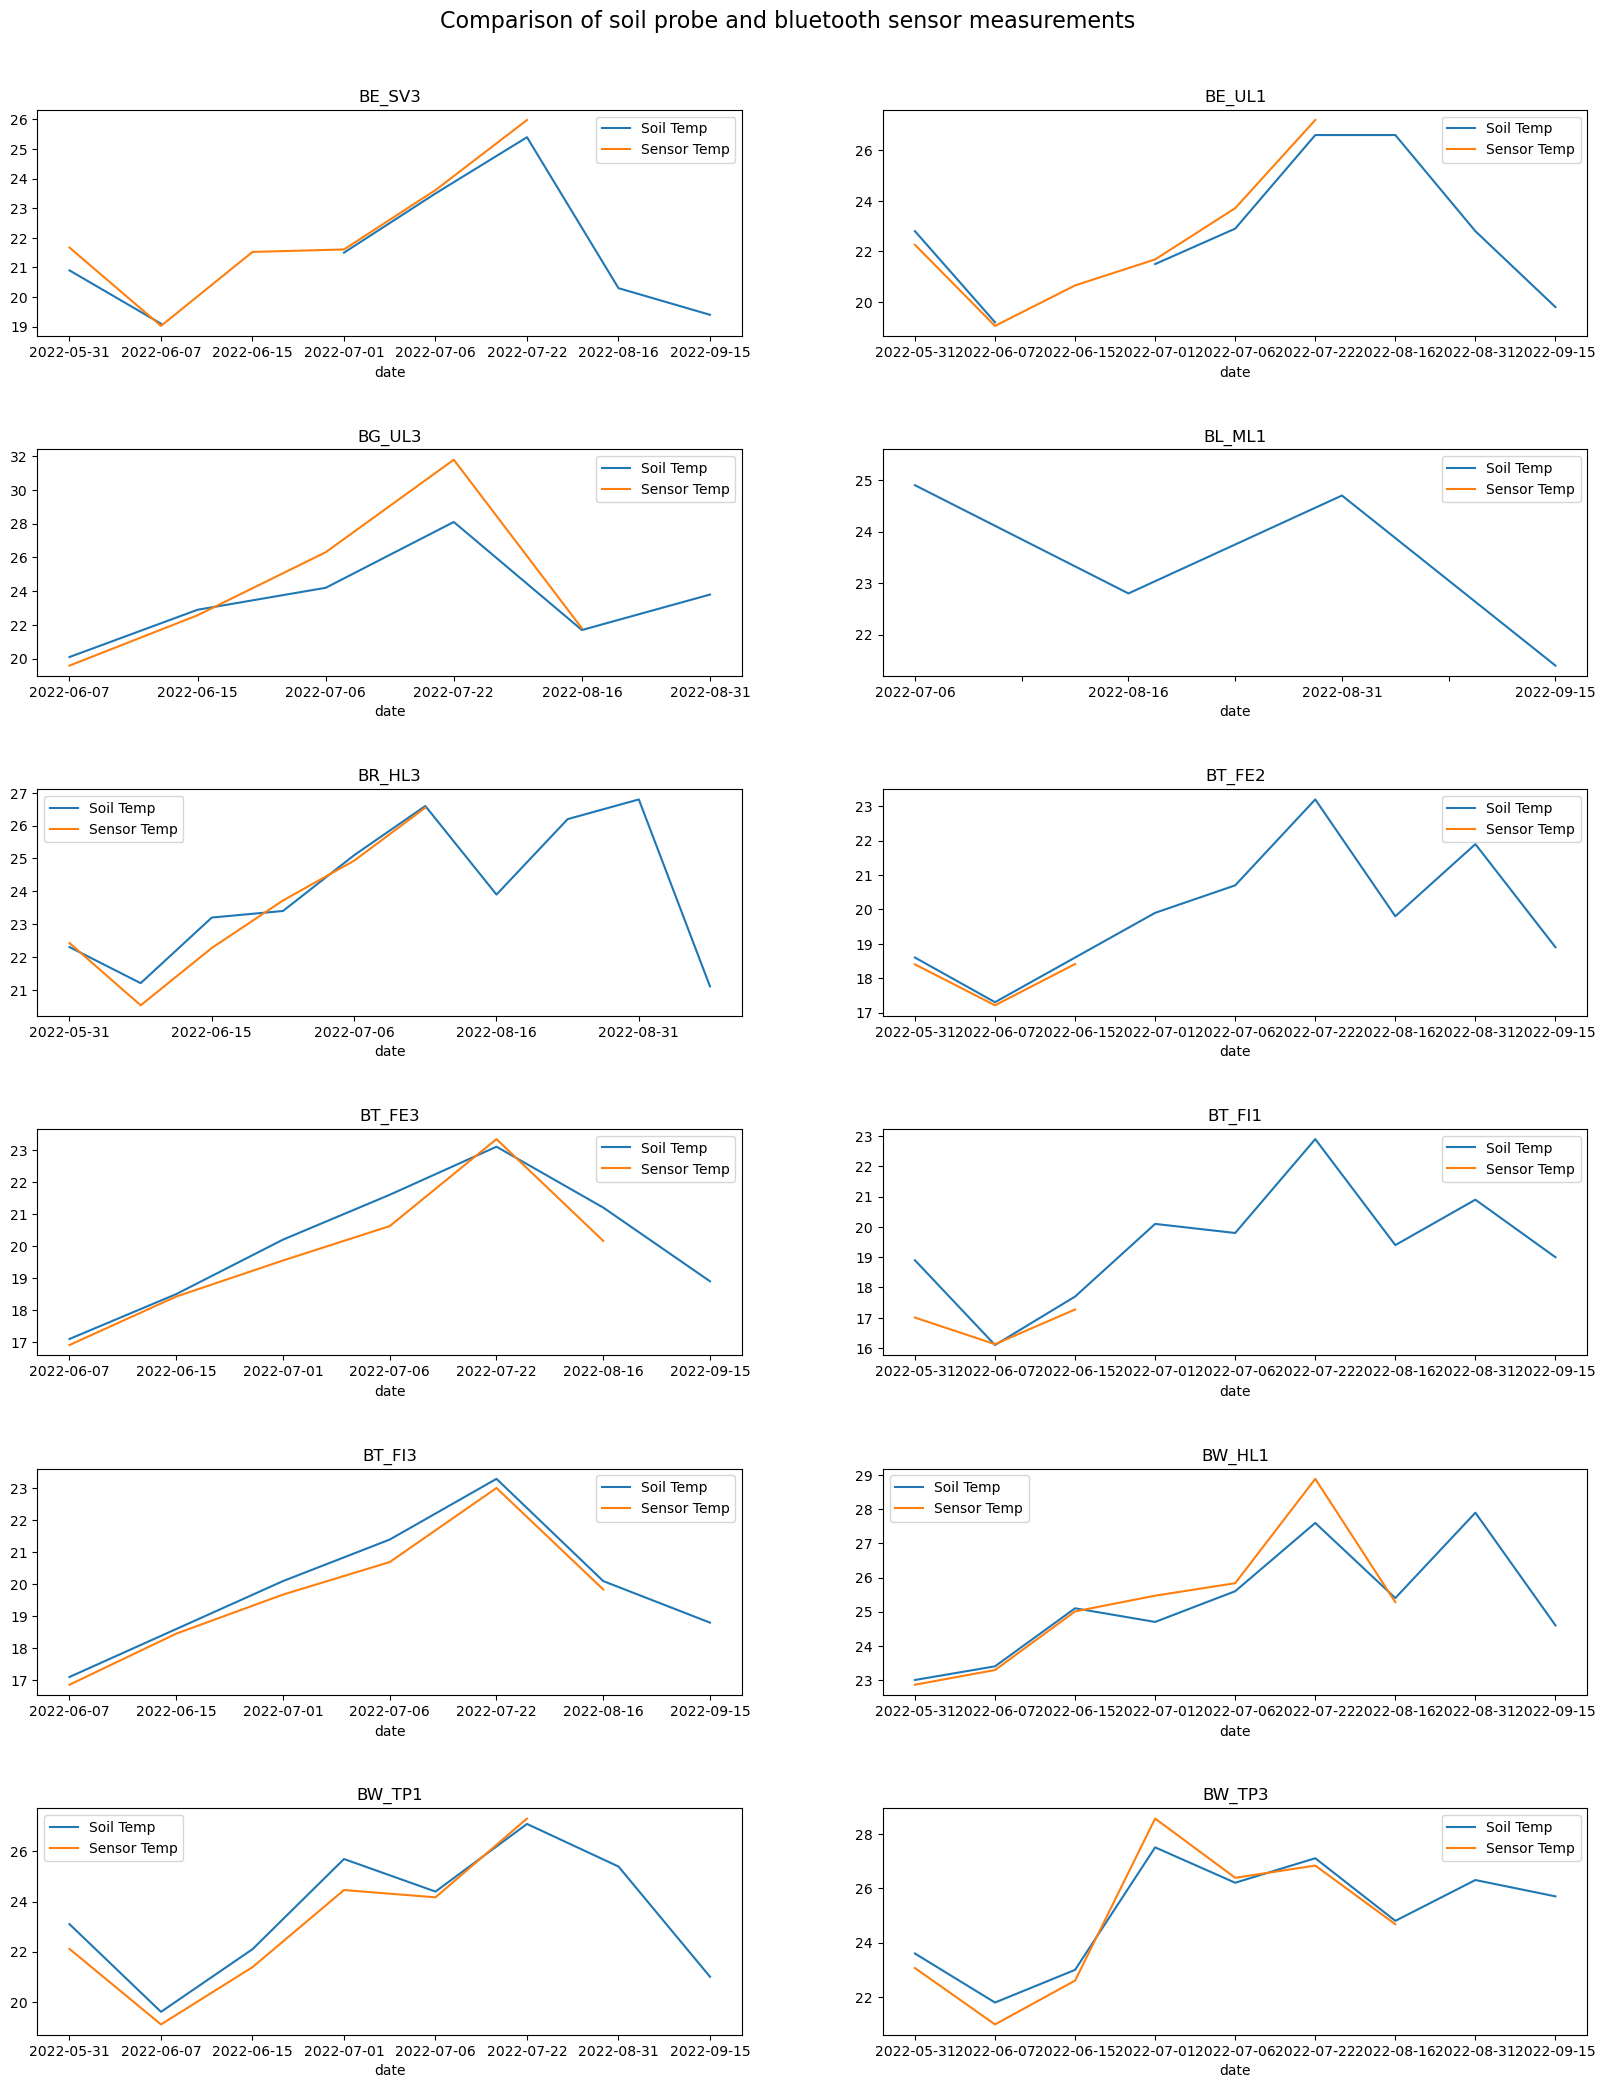

In [71]:
# define subplot grid
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 25))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Comparison of soil probe and bluetooth sensor measurements", fontsize=16, y=.92)

# loop through collars and axes
for collar, ax in zip(collars, axs.ravel()):
    
    grouped.get_group(collar).plot('date','Temperature',ax=ax)
    grouped.get_group(collar).plot('date','sensor_mean',ax=ax)

   
    ax.set_title(collar)
    ax.legend(['Soil Temp', 'Sensor Temp'])
    
filename = 'temps_comparison.png'
plt.savefig(os.path.join(file_path,filename))
plt.show()